In [1]:
from __future__ import print_function
import numpy as np
import matplotlib.pyplot as plt
import re

from matplotlib import rc
rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
## for Palatino and other serif fonts use:
#rc('font',**{'family':'serif','serif':['Palatino']})
rc('text', usetex=True)
plt.rc('text', usetex=True)
plt.rc('font', family='serif')
%matplotlib inline

/Users/perdue/anaconda/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [2]:
def compute_purity_via_row_norm(arr):
    pur_arr = np.zeros_like(arr)
    pur_arr_err = np.zeros_like(arr)
    for i in range(np.shape(arr)[0]):
        npass = arr[i, :]
        ntotal = arr.sum(axis=1)[i]
        epsilon = npass / ntotal
        pur_arr[i, :] = epsilon
        pur_arr_err[i, :] = np.sqrt(epsilon * (1 - epsilon) / ntotal)
        
    return pur_arr, pur_arr_err

In [3]:
def compute_effic_via_col_norm(arr):
    eff_arr = np.zeros_like(arr)
    eff_arr_err = np.zeros_like(arr)
    for i in range(np.shape(arr)[0]):
        npass = arr[:, i]
        ntotal = arr.sum(axis=0)[i]
        epsilon = npass / ntotal
        eff_arr[:, i] = epsilon
        eff_arr_err[i, :] = np.sqrt(epsilon * (1 - epsilon) / ntotal)
        
    return eff_arr, eff_arr_err

In [4]:
def make_plots_rowcolnormonly(arr, plot_type, top_title='Purity', bottom_title='Efficiency', colormap='Reds'):
    """
    plots and text for confusion matrices
    """
    fig = plt.figure(figsize=(16,16))
    gs = plt.GridSpec(2, 2)

    # purity calc
    pur_arr, pur_arr_err = compute_purity_via_row_norm(arr)
    eff_arr, eff_arr_err = compute_effic_via_col_norm(arr)

    print("purity (row-normalized diagonal values)")
    for i in range(pur_arr.shape[0]):
        print('segment {:2d}: purity = {:.3f}'.format(i, pur_arr[i, i]))

    print("efficiency (column-normalized diagonal values)")
    for i in range(eff_arr.shape[0]):
        print('segment {:2d}: efficiency = {:.3f}'.format(i, eff_arr[i, i]))
    
    def make_title_string(title_base, title_mod, logscale):
        title = title_base.format(title_mod)
        title = r'Log$_{10}$ ' + title if logscale else title
        return title
    
    def make_subplot(ax, show_arr, colormap, title):
        im = ax.imshow(show_arr, cmap=plt.get_cmap(colormap), interpolation='nearest', origin='lower')
        cbar = plt.colorbar(im, fraction=0.04)
        plt.title(title)
        plt.xlabel('True z-segment')
        plt.ylabel('Reconstructed z-segment')
        
    # purity linear plots
    ax = plt.subplot(gs[0])
    show_arr = pur_arr
    make_subplot(ax, show_arr, colormap, make_title_string('Purity (row normalized)\n{}', top_title, False))

    # purity log plots
    ax = plt.subplot(gs[1])
    show_arr = np.log10(pur_arr * 100.0)
    make_subplot(ax, show_arr, colormap, make_title_string('Purity (row normalized)\n{}', top_title, True))
    
    # efficiency linear plots
    ax = plt.subplot(gs[2])
    show_arr = eff_arr
    make_subplot(ax, show_arr, colormap, make_title_string('Efficiency (column normalized)\n{}', bottom_title, False))

    # efficiency log plots
    ax = plt.subplot(gs[3])
    show_arr = np.log10(eff_arr * 100.0)
    make_subplot(ax, show_arr, colormap, make_title_string('Efficiency (column normalized)\n{}', bottom_title, True))

    fig.savefig('confusion_matrices_rowcolnorm_{}.pdf'.format(plot_type), bbox_inches='tight')

In [5]:
arr = np.load('./WilsonCluster/saved_logs/perfmat1487611077.npy')
print(arr.shape)
plot_type = 'planecode_energy_only'

(67, 67)


/Users/perdue/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:7: RuntimeWarning: invalid value encountered in divide
/Users/perdue/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:39: RuntimeWarning: divide by zero encountered in log10


purity (row-normalized diagonal values)
segment  0: purity = 0.042
segment  1: purity = 0.000
segment  2: purity = 0.000
segment  3: purity = 0.013
segment  4: purity = 0.360
segment  5: purity = 0.631
segment  6: purity = 0.413
segment  7: purity = 0.620
segment  8: purity = 0.341
segment  9: purity = 0.952
segment 10: purity = 0.167
segment 11: purity = 0.676
segment 12: purity = 0.725
segment 13: purity = 0.718
segment 14: purity = 0.700
segment 15: purity = 0.628
segment 16: purity = 0.647
segment 17: purity = 0.400
segment 18: purity = 0.951
segment 19: purity = 0.225
segment 20: purity = 0.659
segment 21: purity = 0.710
segment 22: purity = 0.721
segment 23: purity = 0.714
segment 24: purity = 0.651
segment 25: purity = 0.655
segment 26: purity = 0.429
segment 27: purity = 0.928
segment 28: purity = 0.437
segment 29: purity = 0.691
segment 30: purity = 0.746
segment 31: purity = 0.708
segment 32: purity = 0.730
segment 33: purity = 0.659
segment 34: purity = 0.679
segment 35: pur

/Users/perdue/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:49: RuntimeWarning: divide by zero encountered in log10


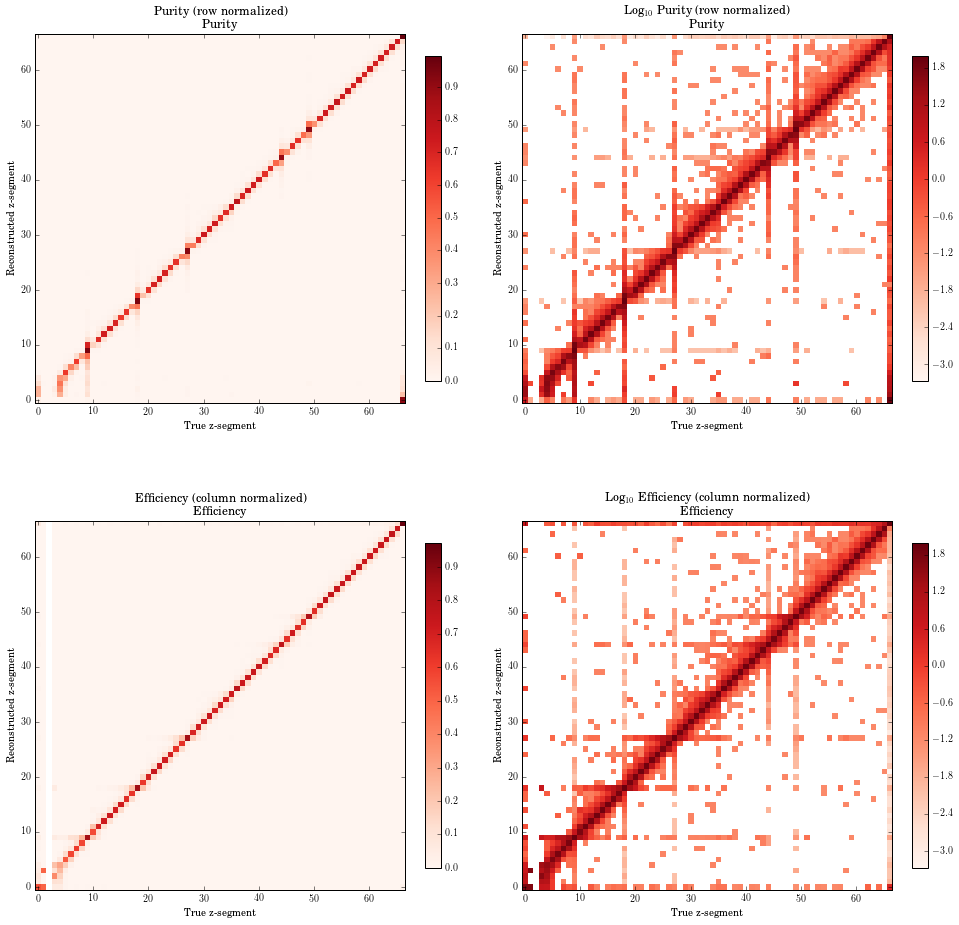

In [6]:
make_plots_rowcolnormonly(arr, plot_type)